## Reference states

By convention, the starting state of an $n$-qubit quantum circuit is the _default state_ $|0\rangle^{\otimes n}$. However, it can be more convenient in some cases to start your variational algorithm from a different state. For example, if you have an educated guess of the solution, the variational algorithm will likely converge faster if you start with that state. We will refer to this "starting" state as the _reference state_ $|\rho\rangle$.

In order to prepare said reference state, we will need to apply the appropriate unitary $U_R$ at the start of our quantum circuit; such that $|\rho\rangle = U_R |0\rangle$.

## Trivial reference state

The simplest possible reference state is the starting state of any $n$-qubit quantum register (i.e. the default state): $|\rho\rangle \equiv |0\rangle^{\otimes n}$, which corresponds to the unitary operator $U_R \equiv I$. However simple, this is a valid reference state which gets used in many scenarios, so keep it in mind!

## Classical reference state

For instance, imagine that you have a $3$-qubit system and you want to start in the state $|001\rangle$ instead of $|000\rangle$. This is a purely classical reference state and, in order to build it, you simply need to apply an [X gate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.XGate.html) to qubit $0$ (following Qiskit's qubit ordering), since $|001\rangle=X_0|000\rangle$. 

That leads to the reference state $|\rho\rangle \equiv |001\rangle$ and corresponding unitary operator $U_R \equiv X_0$.

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


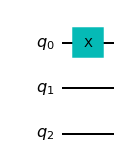

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(3)
qc.x(0)

print(Statevector(qc))
qc.draw("mpl")

## Quantum reference state

Now imagine that you want to start with a more complicated state with some superposition and/or entanglement; like $\frac{1}{\sqrt{2}}(|100\rangle+|111\rangle)$. One way to get this state from $|000\rangle$ is to apply a [Hadamard gate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.HGate.html) to qubit $0$ ($H_0$), a [CNOT (CX)](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CXGate.html) whose control qubit is qubit $0$ and whose target qubit is qubit $1$ ($CNOT_{01}$) and finally an $X$ gate acting on qubit $2$ ($X_2$). So $\frac{1}{\sqrt{2}}(|100\rangle+|111\rangle) = X_2CNOT_{01}H_0|000\rangle$. 

This leads to the reference state $|\rho\rangle \equiv \frac{1}{\sqrt{2}}(|100\rangle+|111\rangle)$ and corresponding unitary operator $U_R \equiv X_2CNOT_{01}H_0$.

Statevector([0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


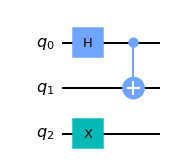

In [2]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.x(2)

print(Statevector(qc))
qc.draw("mpl")



## Reference parametrization

Let's now assume that you want to run the same algorithm for several different reference states like $\frac{\sqrt{3}}{2}|100\rangle-\frac{i}{2}|111\rangle$, and $\frac{1}{\sqrt{2}}|100\rangle-\frac{i}{\sqrt{2}}|111\rangle$; which can be achieved through $X_2CNOT_{01}R_X(\frac{\pi}{3})|000\rangle$ and $X_2CNOT_{01}R_X(\frac{\pi}{2})|000\rangle$, respectively. 

It is explicit from the expressions that both states can be retrieved from the parameterized unitary/circuit $U_R(\alpha) \equiv X_2CNOT_{01}R_X(\alpha)$, letting $\alpha = \lbrace \frac{\pi}{3}, \frac{\pi}{2} \rbrace$ respectively. Nonetheless, this does not mean that we have a _parametrized reference state_ which is **forbidden** by definition (i.e. reference states must be actual states). Instead, each value of the parameter $\alpha$ represents a different reference state, and therefore a "different" variational workload; so this should be regarded only as a convenient way to write a set of _workload configurations_. 

Generally speaking, the reference parameters $\vec{\alpha}$ are always fixed for a given payload, and therefore remain separate from the variational parameters which will be included through a [_variational form_](ansatz.ipynb). Starting from different reference states will nonetheless have a major impact on the algorithm's performance by changing the states that it can reach and how those are explored.

In mathematical terms, a reference state $|\rho\rangle$ is the result of applying a non-parameterized (unitary) operator $U_R$ to the state $|0\rangle^{\otimes n}$ before applying the [variational form](ansatz.ipynb), so $|\rho\rangle = U_R|0\rangle^{\otimes n}$. Even though a set of different reference operators $\{U_{R1}, U_{R2},..., U_{RN}\}$ might be expressed as $\{U_R(\vec{\alpha})$ for $\vec{\alpha} \in \{\vec{\alpha}_1,\vec{\alpha}_2,...,\vec{\alpha}_N\}\} = \{U_R(\vec{\alpha}_1),U_R(\vec{\alpha}_2),...,U_R(\vec{\alpha}_N)\}$, and $U_R(\vec{\alpha})$ in turn as a parameterized quantum circuit, it does not mean that the reference state is parametrized —for those parameters will always be fixed throughout the algorithm run.

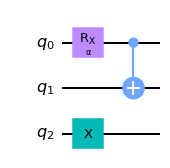

In [3]:
from qiskit.circuit import Parameter

alpha = Parameter("α")

qc = QuantumCircuit(3)
qc.rx(alpha,0)
qc.cx(0,1)
qc.x(2)

qc.draw("mpl")

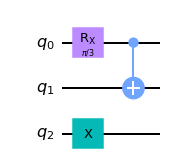

Statevector([0.       +0.j , 0.       +0.j , 0.       +0.j ,
             0.       +0.j , 0.8660254+0.j , 0.       +0.j ,
             0.       +0.j , 0.       -0.5j],
            dims=(2, 2, 2))


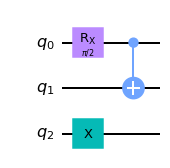

Statevector([0.        +0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        +0.j        ,
             0.70710678+0.j        , 0.        +0.j        ,
             0.        +0.j        , 0.        -0.70710678j],
            dims=(2, 2, 2))


In [4]:
from math import pi

alphas = [pi/3, pi/2]
circuits = [qc.bind_parameters({alpha: a}) for a in alphas]

for circuit in circuits:
    display(circuit.draw("mpl"))
    print(Statevector(circuit))

## Standard examples

### Quantum Chemistry
In Quantum Chemistry, the _Hartree-Fock_ state is an approximation of the ground state of an atom or molecule, so it is oftentimes used as reference state for a variational algorithms that aim at finding the exact ground state.

### Quantum Machine Learning
In a [variational quantum classifier (VQC)](https://learn.qiskit.org/course/machine-learning/variational-classification), training data is encoded into a quantum state with a parameterized circuit called _feature map_, where each value of the parameters represents a data point from the training dataset. An example of this kind of circuits is Qiskit's [ZFeatureMap](https://qiskit.org/documentation/stubs/qiskit.circuit.library.ZFeatureMap.html).

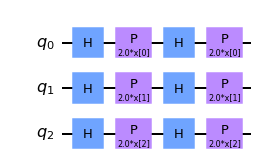

In [5]:
from qiskit.circuit.library import ZFeatureMap

qc = ZFeatureMap(feature_dimension=3, reps=2)
qc.decompose().draw("mpl")

In [6]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright